In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("Ryan_Cleaned_Data/CombinedTotal.csv", low_memory = False)
df2 = pd.read_csv("cleaner_winelist.csv", low_memory = False)

In [3]:
df.head()

,Country,Description,Designation,Points,Price,Province,Region_1,Region_2,Variety,Winery,Title
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,NaN
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,NaN
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,NaN
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,NaN
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,NaN


In [4]:
columns_lower = {}
for item in df.columns:
    columns_lower[item] = item.lower()
df = df.rename(columns = columns_lower)

### Price vs Points

In [5]:
# mean and median prices within each point value
avg_price = df[["points", "price"]].groupby("points").mean().rename(columns = {"price": "mean"})
avg_price["median"] = df[["points", "price"]].groupby("points").median()
avg_price

,mean,median
points,,
80,16.923592,14.0
81,17.245968,14.0
82,18.889270,15.0
83,18.191786,15.0
84,19.316400,15.0
85,19.999340,16.0
86,22.032735,18.0
87,24.853420,20.0
88,28.493495,24.0


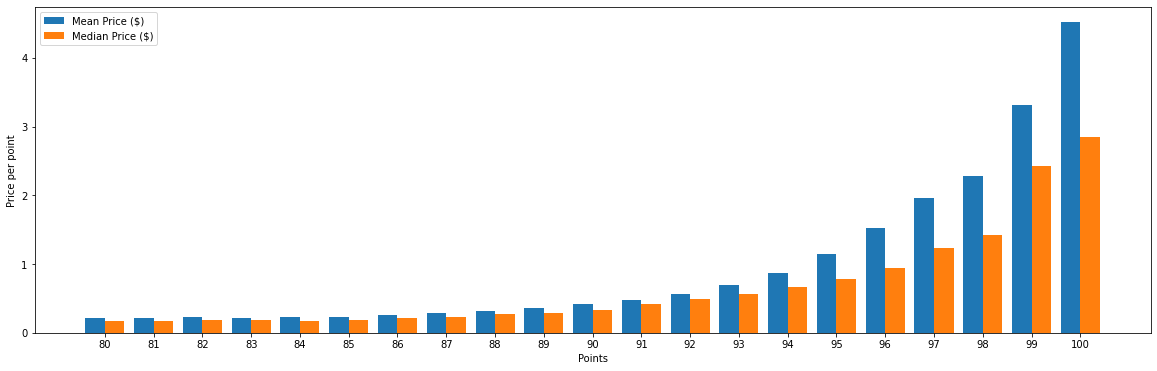

In [6]:
plt.figure(figsize = (20, 6))

plt.bar(avg_price.index, avg_price["mean"] / avg_price.index, width = -0.4, align = "edge")
plt.bar(avg_price.index, avg_price["median"] / avg_price.index, width = 0.4, align = "edge")
plt.xlabel("Points")
plt.xticks(np.arange(80, 101, 1))
plt.ylabel("Price per point")
plt.legend(["Mean Price ($)", "Median Price ($)"])

plt.show()

### Wine Drinkers

In [7]:
# building dataframe with mean/median points and prices, and total review count for each wine taster
tasters_mean = df2[["points", "price", "taster_name"]].groupby("taster_name").mean().rename(columns = {"points": "points_mean", "price": "price_mean"})
tasters_median = df2[["points", "price", "taster_name"]].groupby("taster_name").median().rename(columns = {"points": "points_median", "price": "price_median"})
tasters_count = df2[["points", "taster_name"]].groupby("taster_name").count().rename(columns = {"points": "count"})
tasters_avg = pd.merge(tasters_mean, tasters_median, on = "taster_name")
tasters_df = pd.merge(tasters_avg, tasters_count, on = "taster_name")
tasters_df = tasters_df.sort_values(by = "count", ascending = False)
tasters_df

,points_mean,price_mean,points_median,price_median,count
taster_name,,,,,
Roger Voss,88.732830,39.433101,88,23.0,23558
Michael Schachner,86.857316,25.261283,87,17.0,14045
Kerin O’Keefe,88.899783,42.398895,89,30.0,9679
Paul Gregutt,89.094057,33.707140,89,29.0,8867
Virginie Boone,89.220972,46.884691,90,39.0,8707
Matt Kettmann,90.061616,38.855016,90,36.0,5729
Joe Czerwinski,88.525708,35.492785,89,22.0,4765
Sean P. Sullivan,88.755157,34.241520,89,30.0,4460
Anna Lee C. Iijima,88.416480,30.271263,88,22.0,4017


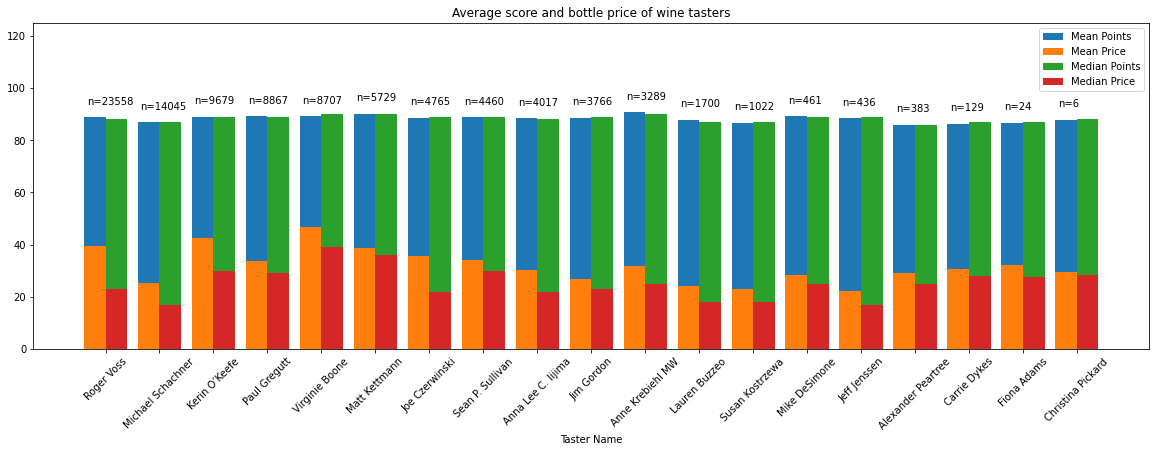

In [8]:
plt.figure(figsize = (20, 6))

plt.bar(tasters_df.index, tasters_df.points_mean, width = -0.4, align = "edge")
plt.bar(tasters_df.index, tasters_df.price_mean, width = -0.4, align = "edge")
plt.bar(tasters_df.index, tasters_df.points_median, width = 0.4, align = "edge")
plt.bar(tasters_df.index, tasters_df.price_median, width = 0.4, align = "edge")

plt.xlabel("Taster Name")
plt.xticks(rotation = 45)
plt.ylim(0, 125)
plt.legend(["Mean Points", "Mean Price", "Median Points", "Median Price"])
plt.title("Average score and bottle price of wine tasters")

i = 0
for name in tasters_df.index:
    plt.annotate(f'n={tasters_df.loc[tasters_df.index == name]["count"][0]}', (i - 0.35, tasters_df.loc[tasters_df.index == name]["points_mean"] + 5))
    i += 1

plt.show()

### Country

In [9]:
# mean/median prices and points by country
country_mean = df[["country", "points", "price"]].groupby("country").mean().rename(columns = {"points": "points_mean", "price": "price_mean"})
country_median = df[["country", "points", "price"]].groupby("country").median().rename(columns = {"points": "points_median", "price": "price_median"})
country_count = df[["country", "points"]].groupby("country").count().rename(columns = {"points": "count"})

In [10]:
country_avg = pd.merge(country_mean, country_median, on = "country")

In [11]:
# limit to countries with 1000+ entries
country_list = country_count.loc[country_count["count"] > 1000].sort_values(by = "count", ascending = False).index
country_list

Index(['US', 'France', 'Italy', 'Spain', 'Portugal', 'Chile', 'Argentina',
       'Australia', 'Austria', 'Germany', 'New Zealand', 'South Africa'],
      dtype='object', name='country')

In [12]:
top_countries = country_avg.loc[country_avg.index.isin(country_list)].sort_values(by = "points_mean", ascending = False)
top_countries

,points_mean,price_mean,points_median,price_median
country,,,,
Austria,89.932426,31.616272,90.0,25.0
Germany,89.324866,40.369581,89.0,25.0
France,88.867295,42.704499,89.0,25.0
Italy,88.499660,38.946841,88.0,28.0
US,88.301989,35.587139,88.0,30.0
Portugal,88.243998,26.838006,88.0,17.0
Australia,88.138952,32.771190,88.0,20.0
New Zealand,87.846184,25.585644,88.0,20.0
South Africa,87.635825,22.782755,87.0,18.0


In [13]:
country_df = pd.merge(top_countries, country_count, on = "country").sort_values(by = "points_mean", ascending = False)
country_df

,points_mean,price_mean,points_median,price_median,count
country,,,,,
Austria,89.932426,31.616272,90.0,25.0,3966
Germany,89.324866,40.369581,89.0,25.0,2795
France,88.867295,42.704499,89.0,25.0,27173
Italy,88.499660,38.946841,88.0,28.0,25009
US,88.301989,35.587139,88.0,30.0,70857
Portugal,88.243998,26.838006,88.0,17.0,6914
Australia,88.138952,32.771190,88.0,20.0,4390
New Zealand,87.846184,25.585644,88.0,20.0,2594
South Africa,87.635825,22.782755,87.0,18.0,2194


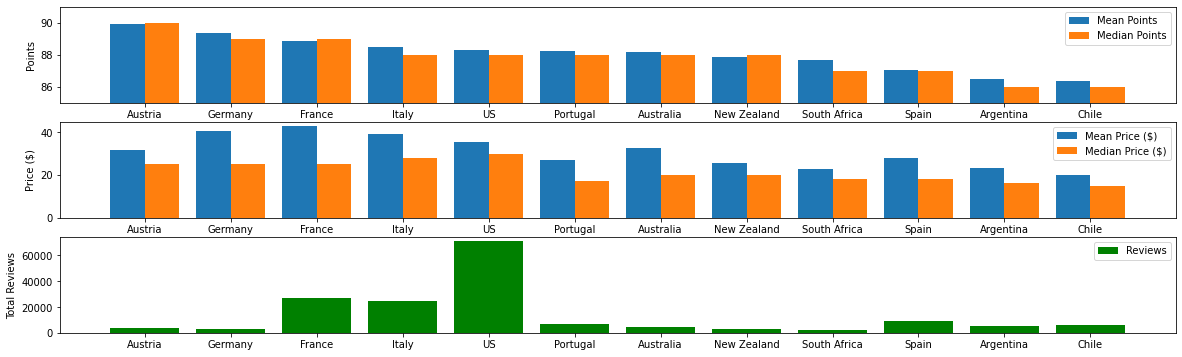

In [14]:
plt.figure(figsize = (20,6))

plt.subplot(311)
plt.bar(country_df.index, country_df.points_mean, width = -0.4, align = "edge")
plt.bar(country_df.index, country_df.points_median, width = 0.4, align = "edge")
plt.ylim(85, 91)
plt.ylabel("Points")
plt.legend(["Mean Points", "Median Points"])

plt.subplot(312)
plt.bar(country_df.index, country_df.price_mean, width = -0.4, align = "edge")
plt.bar(country_df.index, country_df.price_median, width = 0.4, align = "edge")
plt.ylabel("Price ($)")
plt.legend(["Mean Price ($)", "Median Price ($)"])

plt.subplot(313)
plt.bar(country_df.index, country_df["count"], color = "green")
plt.ylabel("Total Reviews")
plt.legend(["Reviews"])

plt.show()

In [15]:
df.loc[df["points"] == 100].sort_values(by = "price", ascending = False).head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery,title
160222,France,This is the finest Cheval Blanc for many years...,NaN,100,1500.0,Bordeaux,Saint-Émilion,NaN,Bordeaux-style Red Blend,Château Cheval Blanc,Château Cheval Blanc 2010 Saint-Émilion
160220,France,"Almost black in color, this stunning wine is g...",NaN,100,1500.0,Bordeaux,Pauillac,NaN,Bordeaux-style Red Blend,Château Lafite Rothschild,Château Lafite Rothschild 2010 Pauillac
25504,France,A wine that has created its own universe. It h...,Clos du Mesnil,100,1400.0,Champagne,Champagne,NaN,Chardonnay,Krug,NaN
2068,France,"Full of ripe fruit, opulent and concentrated, ...",NaN,100,848.0,Bordeaux,Pessac-Léognan,NaN,Bordeaux-style White Blend,Château Haut-Brion,NaN
161880,Portugal,"A powerful and ripe wine, strongly influenced ...",Nacional Vintage,100,650.0,Port,NaN,NaN,Port,Quinta do Noval,Quinta do Noval 2011 Nacional Vintage (Port)


### Wine Variety

In [16]:
varieties_mean = df[["points", "price", "variety"]].groupby("variety").mean().rename(columns = {"points": "points_mean", "price": "price_mean"})
varieties_median = df[["points", "price", "variety"]].groupby("variety").median().rename(columns = {"points": "points_median", "price": "price_median"})
varieties_count = df[["points", "variety"]].groupby("variety").count().rename(columns = {"points": "count"})

In [17]:
varieties_avg = pd.merge(varieties_mean, varieties_median, on = "variety")
varieties_df = pd.merge(varieties_avg, varieties_count, on = "variety")

In [18]:
# look at which varieties were reviewed the most times
varieties_df.sort_values(by = "count", ascending = False).head(10)

,points_mean,price_mean,points_median,price_median,count
variety,,,,,
Pinot Noir,89.174203,46.552574,89.0,40.0,16653
Chardonnay,88.117816,33.753920,88.0,25.0,15626
Cabernet Sauvignon,88.389643,45.866926,88.0,35.0,13266
Red Blend,88.246435,35.661852,88.0,28.0,11220
Bordeaux-style Red Blend,89.211801,47.028954,89.0,30.0,8999
Sauvignon Blanc,87.145145,19.528892,87.0,18.0,6807
Riesling,89.094474,31.042045,89.0,22.0,6605
Syrah,88.899300,37.937837,89.0,32.0,5859
Merlot,86.798445,27.623080,87.0,22.0,4758


In [19]:
varieties_df["count"].describe()

count      756.000000
mean       224.190476
std       1234.851940
min          1.000000
25%          2.000000
50%          6.000000
75%         32.250000
max      16653.000000
Name: count, dtype: float64

In [20]:
varieties_df.loc[varieties_df["count"] > 1250].count()

points_mean      30
price_mean       30
points_median    30
price_median     30
count            30
dtype: int64

In [21]:
# highest scorers with 1250+ entries
varieties_df.loc[varieties_df["count"] > 1250].sort_values(by = "points_mean", ascending = False).head(10)

,points_mean,price_mean,points_median,price_median,count
variety,,,,,
Nebbiolo,90.322354,66.973444,90.0,57.0,3127
Grüner Veltliner,89.825858,28.293607,90.0,22.0,1516
Champagne Blend,89.651407,71.595812,90.0,55.0,1813
Bordeaux-style Red Blend,89.211801,47.028954,89.0,30.0,8999
Pinot Noir,89.174203,46.552574,89.0,40.0,16653
Riesling,89.094474,31.042045,89.0,22.0,6605
Bordeaux-style White Blend,89.062976,34.068966,89.0,17.0,1445
Syrah,88.899300,37.937837,89.0,32.0,5859
Rhône-style Red Blend,88.885974,33.592406,89.0,29.0,1868


In [22]:
# most expensive varieties
varieties_df.loc[varieties_df["count"] > 1250].sort_values(by = "price_mean", ascending = False).head(10)

,points_mean,price_mean,points_median,price_median,count
variety,,,,,
Champagne Blend,89.651407,71.595812,90.0,55.0,1813
Nebbiolo,90.322354,66.973444,90.0,57.0,3127
"Corvina, Rondinella, Molinara",88.599367,47.254065,88.0,36.0,1263
Bordeaux-style Red Blend,89.211801,47.028954,89.0,30.0,8999
Pinot Noir,89.174203,46.552574,89.0,40.0,16653
Cabernet Sauvignon,88.389643,45.866926,88.0,35.0,13266
Sangiovese,88.352229,42.088861,88.0,30.0,3634
Syrah,88.899300,37.937837,89.0,32.0,5859
Shiraz,88.502381,37.470909,89.0,22.0,1680


In [23]:
# calculate points per dollar numbers
wine_value_df = df[["title", "points", "price"]].dropna()
wine_value_df["value"] = wine_value_df["points"]/wine_value_df["price"]

In [24]:
wine_value_df.sort_values(by = "value", ascending = False).head()

,title,points,price,value
99218,Felix Solis 2013 Flirty Bird Syrah (Vino de la...,85,4.0,21.25
110278,Dancing Coyote 2015 White (Clarksburg),85,4.0,21.25
163052,Felix Solis 2012 Flirty Bird White (Vino de la...,82,4.0,20.50
112778,In Situ 2008 Reserva Sauvignon Blanc (Aconcagu...,87,5.0,17.40
156532,Mancan NV Fizz Sparkling (California),87,5.0,17.40


In [25]:
wine_value_df.loc[wine_value_df["points"] > 95].sort_values(by = "value", ascending = False).head()

,title,points,price,value
129721,Donkey & Goat 2012 Grenache Noir Grenache (El ...,96,27.0,3.555556
155404,The Eyrie Vineyards 2014 Estate Chardonnay (Du...,96,27.0,3.555556
125220,Château Filhot 2014 Sauternes,96,28.0,3.428571
129779,Eichinger 2014 Gaisberg Reserve Riesling (Kamp...,96,28.0,3.428571
104287,Domaines Schlumberger 2014 Saering Grand Cru R...,96,29.0,3.310345
